In [1]:
#-------------Imports--------------
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import pandas as pd

## Load the dataset and scale images

In [2]:
#-----------Load Dataset-----------

path_train = "fashion_train.npy"
path_test = "fashion_test.npy"

train = np.load(path_train)
test = np.load(path_test)

#Split the training and test data into features and labels
X = train[:,:784]
y = train[:,784]

X = X / 255 # scale the pixels to be between 0 and 1

X_test = test[:,:784]
y_test = test[:,784]

X_test = X_test / 255 # scale the pixels to be between 0 and 1

X = X.reshape((10000, 28, 28, 1))

X_test = X_test.reshape((5000, 28, 28, 1))

print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(10000,)
(5000, 28, 28, 1)
(5000,)


## Split training set into training and validation sets

In [3]:
train_percentage = int((X.shape[0]) * 0.7)
train_percentage

X_train = X[:train_percentage, :]
y_train = y[:train_percentage]

print(X_train.shape)
print(y_train.shape)

X_val = X[train_percentage:, :]
y_val = y[train_percentage:]

print(X_val.shape)
print(y_val.shape)

(7000, 28, 28, 1)
(7000,)
(3000, 28, 28, 1)
(3000,)


## Model definition

In [20]:
CNN = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(48, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation="linear")
]
)

CNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model training

In [21]:
callbacks = [EarlyStopping(patience=3, monitor="val_loss")]

In [22]:
history = CNN.fit(X_train,y_train, epochs=60, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/60
219/219 [==============================] - 5s 21ms/step - loss: 1.4128 - accuracy: 0.3821 - val_loss: 1.0821 - val_accuracy: 0.5610
Epoch 2/60
219/219 [==============================] - 4s 19ms/step - loss: 1.0075 - accuracy: 0.5707 - val_loss: 0.8801 - val_accuracy: 0.6423
Epoch 3/60
219/219 [==============================] - 4s 20ms/step - loss: 0.8843 - accuracy: 0.6383 - val_loss: 0.7717 - val_accuracy: 0.7097
Epoch 4/60
219/219 [==============================] - 4s 19ms/step - loss: 0.7940 - accuracy: 0.6813 - val_loss: 0.7020 - val_accuracy: 0.7213
Epoch 5/60
219/219 [==============================] - 4s 19ms/step - loss: 0.7220 - accuracy: 0.7113 - val_loss: 0.6497 - val_accuracy: 0.7337
Epoch 6/60
219/219 [==============================] - 4s 19ms/step - loss: 0.6832 - accuracy: 0.7206 - val_loss: 0.6210 - val_accuracy: 0.7470
Epoch 7/60
219/219 [==============================] - 4s 19ms/step - loss: 0.6498 - accuracy: 0.7369 - val_loss: 0.5925 - val_accuracy: 0.7580

## Plot the evolution of the training and validation loss

In [23]:
metrics_df = pd.DataFrame(history.history)

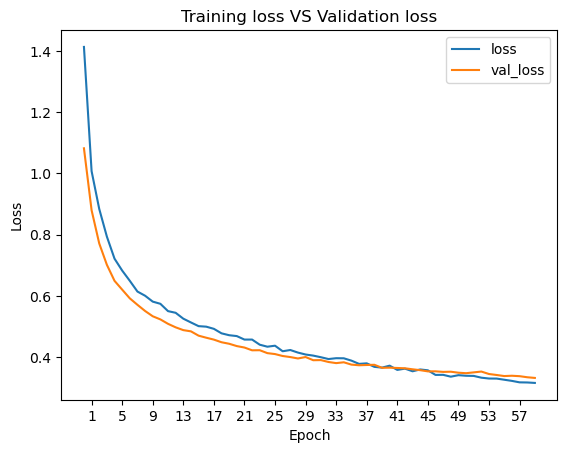

In [24]:
metrics_df[["loss","val_loss"]].plot()
plt.xticks(list(range(1,60,4)))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training loss VS Validation loss");

## Assess model peformance on the training set

In [25]:
logits_train = CNN(X_train)
probs_train = tf.nn.softmax(logits_train)
probs_train = tf.make_tensor_proto(probs_train)
probs_np = tf.make_ndarray(probs_train)
y_pred = np.argmax(probs_np, axis=1)
accuracy_score(y_pred, y_train)

0.905

## Assess model peformance on the validation set

In [26]:
logits_val = CNN(X_val)
probs_val = tf.nn.softmax(logits_val)
probs_val = tf.make_tensor_proto(probs_val)
probs_np_val = tf.make_ndarray(probs_val)
y_pred_val = np.argmax(probs_np_val, axis=1)
accuracy_score(y_pred_val, y_val)

0.8686666666666667

## Final performance test on the test set

In [27]:
logits_test = CNN(X_test)
probs_test = tf.nn.softmax(logits_test)
probs_test = tf.make_tensor_proto(probs_test)
probs_np_test = tf.make_ndarray(probs_test)
y_pred_test = np.argmax(probs_np_test, axis=1)
accuracy_score(y_pred_test, y_test)

0.8702